In [1]:
SensorNum=1 # Sensor number
WindowWidth=[16,32,64,128,256,512,1024] # Window Width
OverlapArray=[4,8,16,32,64,128,256] # sliding window
width=1000 # graph width 
EncodingDim=[4,8,12,16,32,64] # number of hidden layer note
Axis='AccZ' # Axis

WORKSPACE_PATH = "/media/takeyama/HD-PZU3/01_TAKEYAMA_WORKSPACE/02_CommonData/2016-07-25"

In [2]:
#Learning Parameter
BATCH_SIZE =50

In [3]:
import numpy as np
import pandas as pd
from scipy import fftpack
from scipy import signal
import time
import os
import matplotlib.pyplot as plt
import pylab
import pickle
import copy

import processing
import window

import matplotlib.animation as animation
import datetime

%matplotlib inline

In [4]:
from keras.models import Sequential
from keras.datasets import cifar10
from keras.layers import Dense, Activation, Flatten
from keras.optimizers import Adadelta
from keras.utils import np_utils
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.utils.visualize_util import model_to_dot, plot
from keras import backend as K
from keras.layers import Input, Dense
from keras.models import Model
from keras.callbacks import EarlyStopping

import matplotlib.image as mpimg


Using Theano backend.
Using gpu device 0: GeForce GTX 1080 (CNMeM is disabled, cuDNN 5005)


In [5]:
DataName='sensor'+str(SensorNum)+'_'+Axis
SensorName='sensor'+str(SensorNum)
DicName='MemSensor'+str(SensorNum)

In [6]:
if not os.path.exists(WORKSPACE_PATH+'/study/'+DataName+'/'): os.makedirs(WORKSPACE_PATH+'/study/'+DataName+'/')
StudyDataPath=WORKSPACE_PATH+'/study/'+DataName+'/'

if not os.path.exists(WORKSPACE_PATH+'/graph/'+DataName+'/loss/'): os.makedirs(WORKSPACE_PATH+'/graph/'+DataName+'/loss/')
GlaphDataPath=WORKSPACE_PATH+'/graph/'+DataName+'/loss/'

if not os.path.exists(WORKSPACE_PATH+'/graph/'+DataName+'/Time'): os.makedirs(WORKSPACE_PATH+'/graph/'+DataName+'/Time')
GlaphDataTimePath=WORKSPACE_PATH+'/graph/'+DataName+'/Time'

if not os.path.exists(WORKSPACE_PATH+'/modelPic/'+DataName+'/'): os.makedirs(WORKSPACE_PATH+'/modelPic/'+DataName+'/')
StudyDataModelPicPath=WORKSPACE_PATH+'/modelPic/'+DataName+'/'

if not os.path.exists(WORKSPACE_PATH+'/window/'+DataName+'/'): os.makedirs(WORKSPACE_PATH+'/window/'+DataName+'/')
WindowDataPath=WORKSPACE_PATH+'/window/'+DataName+'/'

RawDataPath="/media/takeyama/HD-PZU3/01_TAKEYAMA_WORKSPACE/02_CommonData/raw/"

**Phase1 計測データの取得**

In [7]:
dic=processing.LoadDicDataFromFileNPZ(RawDataPath+DicName)

**Phase2 window flame 作成 & Learning**

SampleNum= 16
Overlap= 4
AccZ is registed now
Build Complete
(254742,)
windowData's num =63682
SourceData's aborting data = 2
window shape is (63682, 16, 1)
hiden node = 4
CommonName =_edim=4-Window=16-Overlap=4
Train on 63682 samples, validate on 63682 samples
Epoch 1/50
5s - loss: 0.0188 - val_loss: 0.0017
Epoch 2/50
5s - loss: 0.0012 - val_loss: 9.3188e-04
Epoch 3/50
5s - loss: 8.0335e-04 - val_loss: 6.9952e-04
Epoch 4/50
6s - loss: 6.4332e-04 - val_loss: 5.8848e-04
Epoch 5/50
6s - loss: 5.5643e-04 - val_loss: 5.4017e-04
Epoch 6/50
5s - loss: 5.0437e-04 - val_loss: 4.9543e-04
Epoch 7/50
5s - loss: 4.6826e-04 - val_loss: 4.6543e-04
Epoch 8/50
6s - loss: 4.3833e-04 - val_loss: 4.2514e-04
Epoch 9/50
5s - loss: 4.1459e-04 - val_loss: 3.9917e-04
Epoch 10/50
5s - loss: 3.9224e-04 - val_loss: 3.8222e-04
Epoch 11/50
5s - loss: 3.7074e-04 - val_loss: 3.5830e-04
Epoch 12/50
5s - loss: 3.5106e-04 - val_loss: 3.3797e-04
Epoch 13/50
6s - loss: 3.3273e-04 - val_loss: 3.2340e-04
Epoch 14/50
6s - l

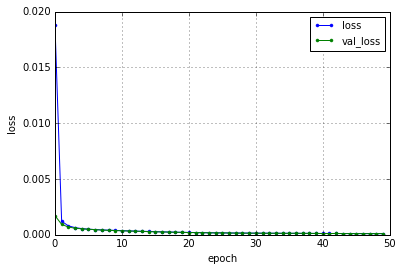

hiden node = 8
CommonName =_edim=8-Window=16-Overlap=4
Train on 63682 samples, validate on 63682 samples
Epoch 1/50
4s - loss: 0.0111 - val_loss: 0.0013
Epoch 2/50
4s - loss: 9.4578e-04 - val_loss: 7.1272e-04
Epoch 3/50
4s - loss: 5.6329e-04 - val_loss: 4.3900e-04
Epoch 4/50
5s - loss: 3.6825e-04 - val_loss: 3.0649e-04
Epoch 5/50
5s - loss: 2.7650e-04 - val_loss: 2.4771e-04
Epoch 6/50
5s - loss: 2.3370e-04 - val_loss: 2.2375e-04
Epoch 7/50
4s - loss: 2.0878e-04 - val_loss: 1.9828e-04
Epoch 8/50
4s - loss: 1.9191e-04 - val_loss: 1.8196e-04
Epoch 9/50
3s - loss: 1.7915e-04 - val_loss: 1.7179e-04
Epoch 10/50
3s - loss: 1.6998e-04 - val_loss: 1.6587e-04
Epoch 11/50
3s - loss: 1.6177e-04 - val_loss: 1.5646e-04
Epoch 12/50
3s - loss: 1.5578e-04 - val_loss: 1.5344e-04
Epoch 13/50
3s - loss: 1.4925e-04 - val_loss: 1.4357e-04
Epoch 14/50
3s - loss: 1.4437e-04 - val_loss: 1.3909e-04
Epoch 15/50
3s - loss: 1.3913e-04 - val_loss: 1.3903e-04
Epoch 16/50
3s - loss: 1.3522e-04 - val_loss: 1.3064e-04


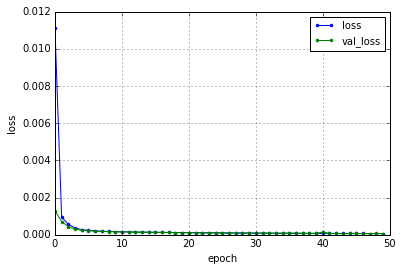

hiden node = 12
CommonName =_edim=12-Window=16-Overlap=4
Train on 63682 samples, validate on 63682 samples
Epoch 1/50
4s - loss: 0.0134 - val_loss: 0.0011
Epoch 2/50
4s - loss: 8.0247e-04 - val_loss: 5.7465e-04
Epoch 3/50
4s - loss: 4.6479e-04 - val_loss: 3.7733e-04
Epoch 4/50
4s - loss: 3.2844e-04 - val_loss: 2.9540e-04
Epoch 5/50
4s - loss: 2.6035e-04 - val_loss: 2.4192e-04
Epoch 6/50
4s - loss: 2.1749e-04 - val_loss: 1.9877e-04
Epoch 7/50
4s - loss: 1.8678e-04 - val_loss: 1.7271e-04
Epoch 8/50
4s - loss: 1.6529e-04 - val_loss: 1.9839e-04
Epoch 9/50
4s - loss: 1.4946e-04 - val_loss: 1.3916e-04
Epoch 10/50
4s - loss: 1.3763e-04 - val_loss: 1.3468e-04
Epoch 11/50
4s - loss: 1.2838e-04 - val_loss: 1.2192e-04
Epoch 12/50
4s - loss: 1.2101e-04 - val_loss: 1.1882e-04
Epoch 13/50
4s - loss: 1.1446e-04 - val_loss: 1.0827e-04
Epoch 14/50
4s - loss: 1.0900e-04 - val_loss: 1.1010e-04
Epoch 15/50
4s - loss: 1.0473e-04 - val_loss: 9.9773e-05
Epoch 16/50
4s - loss: 1.0005e-04 - val_loss: 9.5134e-0

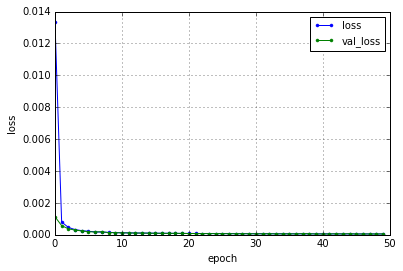

hiden node = 16
CommonName =_edim=16-Window=16-Overlap=4
Train on 63682 samples, validate on 63682 samples
Epoch 1/50
3s - loss: 0.0088 - val_loss: 7.2737e-04
Epoch 2/50
3s - loss: 5.0068e-04 - val_loss: 3.7014e-04
Epoch 3/50
3s - loss: 3.1814e-04 - val_loss: 2.7727e-04
Epoch 4/50
3s - loss: 2.4685e-04 - val_loss: 2.2194e-04
Epoch 5/50
3s - loss: 2.0331e-04 - val_loss: 1.9600e-04
Epoch 6/50
3s - loss: 1.7252e-04 - val_loss: 1.6610e-04
Epoch 7/50
3s - loss: 1.5145e-04 - val_loss: 1.4468e-04
Epoch 8/50
3s - loss: 1.3511e-04 - val_loss: 1.2511e-04
Epoch 9/50
3s - loss: 1.2290e-04 - val_loss: 1.1561e-04
Epoch 10/50
3s - loss: 1.1302e-04 - val_loss: 1.0880e-04
Epoch 11/50
3s - loss: 1.0502e-04 - val_loss: 9.7987e-05
Epoch 12/50
3s - loss: 9.7892e-05 - val_loss: 9.4624e-05
Epoch 13/50
3s - loss: 9.1401e-05 - val_loss: 8.7534e-05
Epoch 14/50
3s - loss: 8.6234e-05 - val_loss: 8.3914e-05
Epoch 15/50
3s - loss: 8.1815e-05 - val_loss: 7.6857e-05
Epoch 16/50
3s - loss: 7.7062e-05 - val_loss: 7.439

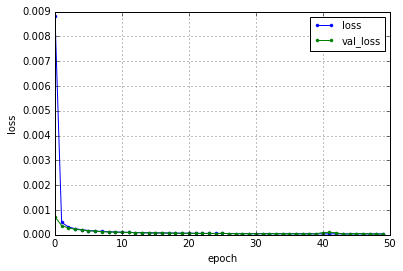

hiden node = 32
CommonName =_edim=32-Window=16-Overlap=4
Train on 63682 samples, validate on 63682 samples
Epoch 1/50
3s - loss: 0.0036 - val_loss: 4.5803e-04
Epoch 2/50
3s - loss: 3.0247e-04 - val_loss: 2.1431e-04
Epoch 3/50
3s - loss: 1.8327e-04 - val_loss: 1.6019e-04
Epoch 4/50
3s - loss: 1.4073e-04 - val_loss: 1.2674e-04
Epoch 5/50
3s - loss: 1.1632e-04 - val_loss: 1.0554e-04
Epoch 6/50
3s - loss: 1.0087e-04 - val_loss: 9.4427e-05
Epoch 7/50
3s - loss: 8.9646e-05 - val_loss: 9.1102e-05
Epoch 8/50
3s - loss: 8.0436e-05 - val_loss: 7.8411e-05
Epoch 9/50
3s - loss: 7.3521e-05 - val_loss: 6.8806e-05
Epoch 10/50
3s - loss: 6.7759e-05 - val_loss: 6.3758e-05
Epoch 11/50
3s - loss: 6.2883e-05 - val_loss: 6.0179e-05
Epoch 12/50
3s - loss: 5.8741e-05 - val_loss: 5.5935e-05
Epoch 13/50
3s - loss: 5.5142e-05 - val_loss: 5.2757e-05
Epoch 14/50
3s - loss: 5.2098e-05 - val_loss: 4.9164e-05
Epoch 15/50
3s - loss: 4.9180e-05 - val_loss: 4.6838e-05
Epoch 16/50
3s - loss: 4.6865e-05 - val_loss: 4.520

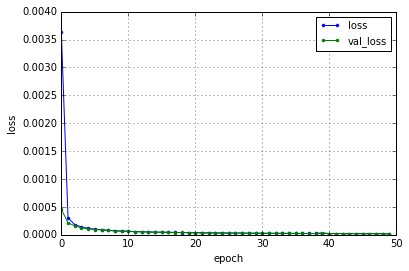

hiden node = 64
CommonName =_edim=64-Window=16-Overlap=4
Train on 63682 samples, validate on 63682 samples
Epoch 1/50
3s - loss: 0.0037 - val_loss: 2.4141e-04
Epoch 2/50
3s - loss: 1.6155e-04 - val_loss: 1.1721e-04
Epoch 3/50
3s - loss: 9.4678e-05 - val_loss: 7.8716e-05
Epoch 4/50
3s - loss: 7.1071e-05 - val_loss: 6.3443e-05
Epoch 5/50
3s - loss: 5.9474e-05 - val_loss: 5.4748e-05
Epoch 6/50
3s - loss: 5.2568e-05 - val_loss: 4.9542e-05
Epoch 7/50
3s - loss: 4.7553e-05 - val_loss: 4.5255e-05
Epoch 8/50
3s - loss: 4.3709e-05 - val_loss: 4.2515e-05
Epoch 9/50
3s - loss: 4.0516e-05 - val_loss: 3.8579e-05
Epoch 10/50
2s - loss: 3.7912e-05 - val_loss: 3.6071e-05
Epoch 11/50
2s - loss: 3.5586e-05 - val_loss: 3.4030e-05
Epoch 12/50
3s - loss: 3.3527e-05 - val_loss: 3.2558e-05
Epoch 13/50
3s - loss: 3.1791e-05 - val_loss: 3.0494e-05
Epoch 14/50
3s - loss: 3.0174e-05 - val_loss: 2.9025e-05
Epoch 15/50
3s - loss: 2.8756e-05 - val_loss: 2.7800e-05
Epoch 16/50
3s - loss: 2.7464e-05 - val_loss: 2.653

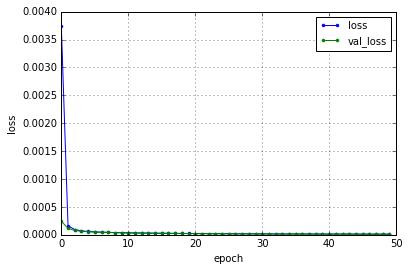

SampleNum= 32
Overlap= 8
AccZ is registed now
Build Complete
(254742,)
windowData's num =31839
SourceData's aborting data = 6
window shape is (31839, 32, 1)
hiden node = 4
CommonName =_edim=4-Window=32-Overlap=8
Train on 31839 samples, validate on 31839 samples
Epoch 1/50
1s - loss: 0.0279 - val_loss: 0.0061
Epoch 2/50
1s - loss: 0.0040 - val_loss: 0.0029
Epoch 3/50
1s - loss: 0.0025 - val_loss: 0.0022
Epoch 4/50
1s - loss: 0.0020 - val_loss: 0.0018
Epoch 5/50
1s - loss: 0.0017 - val_loss: 0.0015
Epoch 6/50
1s - loss: 0.0014 - val_loss: 0.0013
Epoch 7/50
1s - loss: 0.0012 - val_loss: 0.0011
Epoch 8/50
1s - loss: 0.0011 - val_loss: 0.0010
Epoch 9/50
1s - loss: 9.5419e-04 - val_loss: 9.1687e-04
Epoch 10/50
1s - loss: 8.8337e-04 - val_loss: 8.6398e-04
Epoch 11/50
1s - loss: 8.2946e-04 - val_loss: 7.9738e-04
Epoch 12/50
1s - loss: 7.8505e-04 - val_loss: 7.5552e-04
Epoch 13/50
1s - loss: 7.4768e-04 - val_loss: 7.2947e-04
Epoch 14/50
1s - loss: 7.1504e-04 - val_loss: 6.9947e-04
Epoch 15/50
1

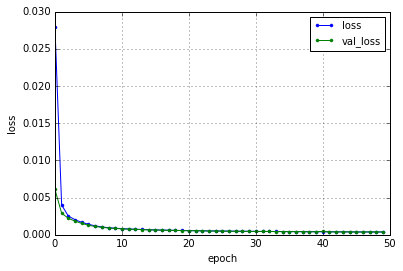

hiden node = 8
CommonName =_edim=8-Window=32-Overlap=8
Train on 31839 samples, validate on 31839 samples
Epoch 1/50
1s - loss: 0.0173 - val_loss: 0.0033
Epoch 2/50
1s - loss: 0.0025 - val_loss: 0.0020
Epoch 3/50
1s - loss: 0.0017 - val_loss: 0.0014
Epoch 4/50
1s - loss: 0.0013 - val_loss: 0.0011
Epoch 5/50
0s - loss: 0.0010 - val_loss: 9.5639e-04
Epoch 6/50
1s - loss: 9.0577e-04 - val_loss: 8.6783e-04
Epoch 7/50
1s - loss: 8.3169e-04 - val_loss: 7.9685e-04
Epoch 8/50
1s - loss: 7.7675e-04 - val_loss: 7.4687e-04
Epoch 9/50
1s - loss: 7.3513e-04 - val_loss: 7.0625e-04
Epoch 10/50
1s - loss: 6.9633e-04 - val_loss: 6.6800e-04
Epoch 11/50
1s - loss: 6.5948e-04 - val_loss: 7.0552e-04
Epoch 12/50
1s - loss: 6.2519e-04 - val_loss: 6.1168e-04
Epoch 13/50
1s - loss: 5.9531e-04 - val_loss: 5.6995e-04
Epoch 14/50
1s - loss: 5.6348e-04 - val_loss: 5.3885e-04
Epoch 15/50
1s - loss: 5.3284e-04 - val_loss: 5.1557e-04
Epoch 16/50
1s - loss: 5.0840e-04 - val_loss: 5.0834e-04
Epoch 17/50
1s - loss: 4.837

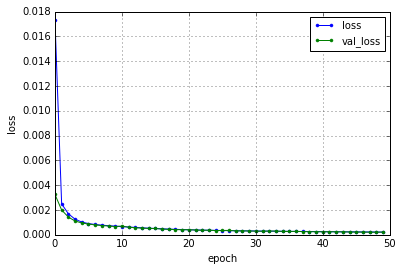

hiden node = 12
CommonName =_edim=12-Window=32-Overlap=8
Train on 31839 samples, validate on 31839 samples
Epoch 1/50
1s - loss: 0.0136 - val_loss: 0.0020
Epoch 2/50
1s - loss: 0.0016 - val_loss: 0.0013
Epoch 3/50
1s - loss: 0.0011 - val_loss: 9.4596e-04
Epoch 4/50
1s - loss: 8.4356e-04 - val_loss: 7.6850e-04
Epoch 5/50
1s - loss: 7.2624e-04 - val_loss: 7.0785e-04
Epoch 6/50
1s - loss: 6.4909e-04 - val_loss: 6.1081e-04
Epoch 7/50
1s - loss: 5.9255e-04 - val_loss: 5.7409e-04
Epoch 8/50
1s - loss: 5.4697e-04 - val_loss: 5.1851e-04
Epoch 9/50
1s - loss: 5.0932e-04 - val_loss: 5.1085e-04
Epoch 10/50
1s - loss: 4.7591e-04 - val_loss: 4.7742e-04
Epoch 11/50
1s - loss: 4.4968e-04 - val_loss: 4.4771e-04
Epoch 12/50
1s - loss: 4.2424e-04 - val_loss: 4.0400e-04
Epoch 13/50
1s - loss: 4.0293e-04 - val_loss: 4.0200e-04
Epoch 14/50
1s - loss: 3.8357e-04 - val_loss: 3.6528e-04
Epoch 15/50
1s - loss: 3.6598e-04 - val_loss: 3.5616e-04
Epoch 16/50
1s - loss: 3.4843e-04 - val_loss: 3.3819e-04
Epoch 17/5

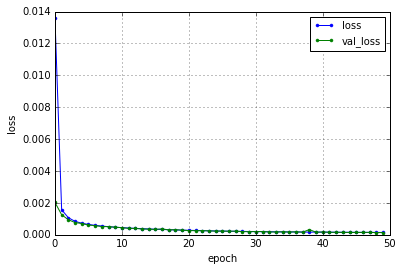

hiden node = 16
CommonName =_edim=16-Window=32-Overlap=8
Train on 31839 samples, validate on 31839 samples
Epoch 1/50
1s - loss: 0.0158 - val_loss: 0.0024
Epoch 2/50
1s - loss: 0.0018 - val_loss: 0.0013
Epoch 3/50
1s - loss: 0.0011 - val_loss: 9.6768e-04
Epoch 4/50
1s - loss: 8.7013e-04 - val_loss: 7.7996e-04
Epoch 5/50
1s - loss: 7.3070e-04 - val_loss: 6.7142e-04
Epoch 6/50
1s - loss: 6.3677e-04 - val_loss: 5.9050e-04
Epoch 7/50
1s - loss: 5.6569e-04 - val_loss: 5.2677e-04
Epoch 8/50
1s - loss: 5.0694e-04 - val_loss: 4.8476e-04
Epoch 9/50
1s - loss: 4.5778e-04 - val_loss: 4.2759e-04
Epoch 10/50
1s - loss: 4.1576e-04 - val_loss: 3.9133e-04
Epoch 11/50
1s - loss: 3.7990e-04 - val_loss: 3.6365e-04
Epoch 12/50
1s - loss: 3.5024e-04 - val_loss: 3.3210e-04
Epoch 13/50
1s - loss: 3.2309e-04 - val_loss: 3.0695e-04
Epoch 14/50
1s - loss: 3.0063e-04 - val_loss: 2.9975e-04
Epoch 15/50
1s - loss: 2.8158e-04 - val_loss: 2.8079e-04
Epoch 16/50
1s - loss: 2.6347e-04 - val_loss: 2.5001e-04
Epoch 17/5

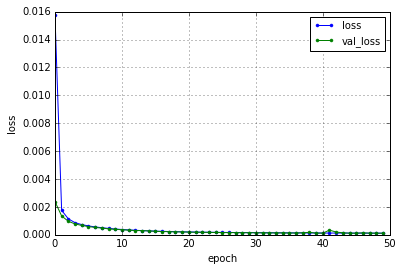

hiden node = 32
CommonName =_edim=32-Window=32-Overlap=8
Train on 31839 samples, validate on 31839 samples
Epoch 1/50
1s - loss: 0.0091 - val_loss: 0.0013
Epoch 2/50
1s - loss: 9.5933e-04 - val_loss: 7.2106e-04
Epoch 3/50
1s - loss: 6.1850e-04 - val_loss: 5.3018e-04
Epoch 4/50
1s - loss: 4.7514e-04 - val_loss: 4.2578e-04
Epoch 5/50
1s - loss: 3.8838e-04 - val_loss: 3.5079e-04
Epoch 6/50
1s - loss: 3.2708e-04 - val_loss: 2.9795e-04
Epoch 7/50
1s - loss: 2.8332e-04 - val_loss: 2.6833e-04
Epoch 8/50
1s - loss: 2.5215e-04 - val_loss: 2.3762e-04
Epoch 9/50
1s - loss: 2.2685e-04 - val_loss: 2.1383e-04
Epoch 10/50
1s - loss: 2.0758e-04 - val_loss: 2.0767e-04
Epoch 11/50
1s - loss: 1.9171e-04 - val_loss: 1.8100e-04
Epoch 12/50
1s - loss: 1.7872e-04 - val_loss: 1.7671e-04
Epoch 13/50
1s - loss: 1.6702e-04 - val_loss: 1.5969e-04
Epoch 14/50
1s - loss: 1.5809e-04 - val_loss: 1.5223e-04
Epoch 15/50
1s - loss: 1.5006e-04 - val_loss: 1.4182e-04
Epoch 16/50
1s - loss: 1.4290e-04 - val_loss: 1.4187e-0

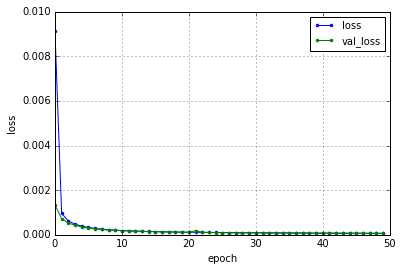

hiden node = 64
CommonName =_edim=64-Window=32-Overlap=8
Train on 31839 samples, validate on 31839 samples
Epoch 1/50
2s - loss: 0.0061 - val_loss: 8.1579e-04
Epoch 2/50
2s - loss: 5.9812e-04 - val_loss: 4.5279e-04
Epoch 3/50
2s - loss: 3.8620e-04 - val_loss: 3.2576e-04
Epoch 4/50
2s - loss: 2.9274e-04 - val_loss: 2.5906e-04
Epoch 5/50
2s - loss: 2.4007e-04 - val_loss: 2.2233e-04
Epoch 6/50
2s - loss: 2.0541e-04 - val_loss: 1.8966e-04
Epoch 7/50
2s - loss: 1.8057e-04 - val_loss: 1.6823e-04
Epoch 8/50
2s - loss: 1.6218e-04 - val_loss: 1.5222e-04
Epoch 9/50
2s - loss: 1.4764e-04 - val_loss: 1.4057e-04
Epoch 10/50
2s - loss: 1.3598e-04 - val_loss: 1.3153e-04
Epoch 11/50
2s - loss: 1.2620e-04 - val_loss: 1.2175e-04
Epoch 12/50
2s - loss: 1.1812e-04 - val_loss: 1.1242e-04
Epoch 13/50
2s - loss: 1.1058e-04 - val_loss: 1.0523e-04
Epoch 14/50
2s - loss: 1.0397e-04 - val_loss: 1.0113e-04
Epoch 15/50
2s - loss: 9.8256e-05 - val_loss: 9.4643e-05
Epoch 16/50
2s - loss: 9.2737e-05 - val_loss: 8.918

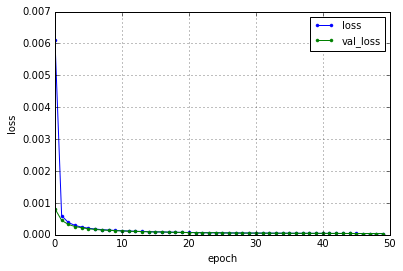

SampleNum= 64
Overlap= 16
AccZ is registed now
Build Complete
(254742,)
windowData's num =15918
SourceData's aborting data = 6
window shape is (15918, 64, 1)
hiden node = 4
CommonName =_edim=4-Window=64-Overlap=16
Train on 15918 samples, validate on 15918 samples
Epoch 1/50
1s - loss: 0.0379 - val_loss: 0.0119
Epoch 2/50
1s - loss: 0.0084 - val_loss: 0.0064
Epoch 3/50
1s - loss: 0.0055 - val_loss: 0.0049
Epoch 4/50
1s - loss: 0.0045 - val_loss: 0.0042
Epoch 5/50
1s - loss: 0.0039 - val_loss: 0.0036
Epoch 6/50
1s - loss: 0.0033 - val_loss: 0.0032
Epoch 7/50
1s - loss: 0.0028 - val_loss: 0.0026
Epoch 8/50
1s - loss: 0.0025 - val_loss: 0.0024
Epoch 9/50
1s - loss: 0.0022 - val_loss: 0.0022
Epoch 10/50
1s - loss: 0.0021 - val_loss: 0.0020
Epoch 11/50
1s - loss: 0.0020 - val_loss: 0.0019
Epoch 12/50
1s - loss: 0.0019 - val_loss: 0.0019
Epoch 13/50
1s - loss: 0.0018 - val_loss: 0.0019
Epoch 14/50
1s - loss: 0.0017 - val_loss: 0.0017
Epoch 15/50
1s - loss: 0.0017 - val_loss: 0.0017
Epoch 16/5

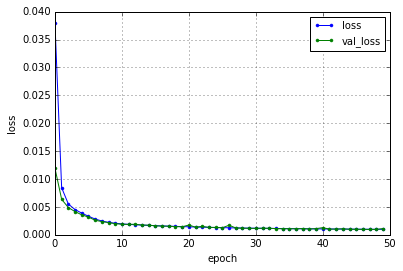

hiden node = 8
CommonName =_edim=8-Window=64-Overlap=16
Train on 15918 samples, validate on 15918 samples
Epoch 1/50
1s - loss: 0.0283 - val_loss: 0.0069
Epoch 2/50
1s - loss: 0.0055 - val_loss: 0.0047
Epoch 3/50
1s - loss: 0.0042 - val_loss: 0.0039
Epoch 4/50
1s - loss: 0.0035 - val_loss: 0.0033
Epoch 5/50
1s - loss: 0.0029 - val_loss: 0.0025
Epoch 6/50
1s - loss: 0.0023 - val_loss: 0.0021
Epoch 7/50
1s - loss: 0.0019 - val_loss: 0.0018
Epoch 8/50
1s - loss: 0.0017 - val_loss: 0.0016
Epoch 9/50
1s - loss: 0.0016 - val_loss: 0.0015
Epoch 10/50
1s - loss: 0.0015 - val_loss: 0.0015
Epoch 11/50
1s - loss: 0.0014 - val_loss: 0.0013
Epoch 12/50
1s - loss: 0.0013 - val_loss: 0.0013
Epoch 13/50
1s - loss: 0.0013 - val_loss: 0.0014
Epoch 14/50
1s - loss: 0.0012 - val_loss: 0.0012
Epoch 15/50
1s - loss: 0.0012 - val_loss: 0.0011
Epoch 16/50
1s - loss: 0.0011 - val_loss: 0.0014
Epoch 17/50
1s - loss: 0.0011 - val_loss: 0.0011
Epoch 18/50
1s - loss: 0.0010 - val_loss: 0.0010
Epoch 19/50
1s - loss

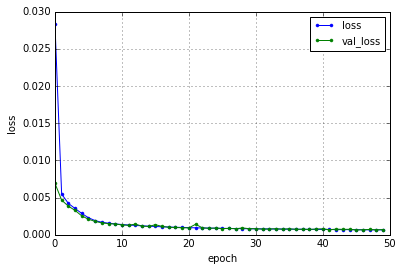

hiden node = 12
CommonName =_edim=12-Window=64-Overlap=16
Train on 15918 samples, validate on 15918 samples
Epoch 1/50
1s - loss: 0.0224 - val_loss: 0.0056
Epoch 2/50
1s - loss: 0.0044 - val_loss: 0.0036
Epoch 3/50
1s - loss: 0.0032 - val_loss: 0.0028
Epoch 4/50
1s - loss: 0.0024 - val_loss: 0.0022
Epoch 5/50
1s - loss: 0.0019 - val_loss: 0.0018
Epoch 6/50
1s - loss: 0.0017 - val_loss: 0.0016
Epoch 7/50
1s - loss: 0.0015 - val_loss: 0.0014
Epoch 8/50
1s - loss: 0.0014 - val_loss: 0.0013
Epoch 9/50
1s - loss: 0.0013 - val_loss: 0.0012
Epoch 10/50
1s - loss: 0.0012 - val_loss: 0.0012
Epoch 11/50
1s - loss: 0.0011 - val_loss: 0.0011
Epoch 12/50
1s - loss: 0.0011 - val_loss: 0.0012
Epoch 13/50
1s - loss: 0.0010 - val_loss: 0.0010
Epoch 14/50
1s - loss: 9.7739e-04 - val_loss: 9.3945e-04
Epoch 15/50
1s - loss: 9.4599e-04 - val_loss: 9.5884e-04
Epoch 16/50
1s - loss: 9.1099e-04 - val_loss: 8.9638e-04
Epoch 17/50
1s - loss: 8.8100e-04 - val_loss: 8.6220e-04
Epoch 18/50
1s - loss: 8.5487e-04 - 

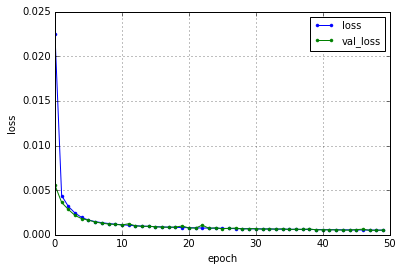

hiden node = 16
CommonName =_edim=16-Window=64-Overlap=16
Train on 15918 samples, validate on 15918 samples
Epoch 1/50
1s - loss: 0.0282 - val_loss: 0.0055
Epoch 2/50
1s - loss: 0.0042 - val_loss: 0.0034
Epoch 3/50
1s - loss: 0.0029 - val_loss: 0.0025
Epoch 4/50
1s - loss: 0.0022 - val_loss: 0.0020
Epoch 5/50
1s - loss: 0.0018 - val_loss: 0.0017
Epoch 6/50
1s - loss: 0.0016 - val_loss: 0.0016
Epoch 7/50
1s - loss: 0.0015 - val_loss: 0.0014
Epoch 8/50
1s - loss: 0.0014 - val_loss: 0.0013
Epoch 9/50
1s - loss: 0.0013 - val_loss: 0.0013
Epoch 10/50
1s - loss: 0.0012 - val_loss: 0.0012
Epoch 11/50
1s - loss: 0.0011 - val_loss: 0.0011
Epoch 12/50
1s - loss: 0.0011 - val_loss: 0.0011
Epoch 13/50
1s - loss: 0.0010 - val_loss: 9.9577e-04
Epoch 14/50
1s - loss: 9.5885e-04 - val_loss: 9.1493e-04
Epoch 15/50
1s - loss: 9.0953e-04 - val_loss: 9.2863e-04
Epoch 16/50
1s - loss: 8.6708e-04 - val_loss: 8.4384e-04
Epoch 17/50
1s - loss: 8.2828e-04 - val_loss: 7.9389e-04
Epoch 18/50
0s - loss: 7.9782e-0

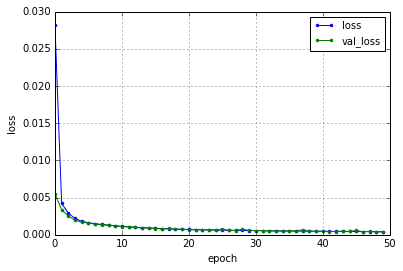

hiden node = 32
CommonName =_edim=32-Window=64-Overlap=16
Train on 15918 samples, validate on 15918 samples
Epoch 1/50
1s - loss: 0.0169 - val_loss: 0.0040
Epoch 2/50
1s - loss: 0.0030 - val_loss: 0.0023
Epoch 3/50
1s - loss: 0.0019 - val_loss: 0.0017
Epoch 4/50
1s - loss: 0.0014 - val_loss: 0.0013
Epoch 5/50
1s - loss: 0.0012 - val_loss: 0.0011
Epoch 6/50
1s - loss: 0.0011 - val_loss: 0.0010
Epoch 7/50
1s - loss: 9.6385e-04 - val_loss: 9.2761e-04
Epoch 8/50
1s - loss: 8.8424e-04 - val_loss: 8.4468e-04
Epoch 9/50
1s - loss: 8.1802e-04 - val_loss: 8.1776e-04
Epoch 10/50
1s - loss: 7.6369e-04 - val_loss: 7.6383e-04
Epoch 11/50
1s - loss: 7.1917e-04 - val_loss: 6.9648e-04
Epoch 12/50
1s - loss: 6.8317e-04 - val_loss: 7.2703e-04
Epoch 13/50
1s - loss: 6.4734e-04 - val_loss: 6.2931e-04
Epoch 14/50
1s - loss: 6.1879e-04 - val_loss: 6.0368e-04
Epoch 15/50
1s - loss: 5.9289e-04 - val_loss: 6.0087e-04
Epoch 16/50
1s - loss: 5.6691e-04 - val_loss: 5.5004e-04
Epoch 17/50
1s - loss: 5.4870e-04 - v

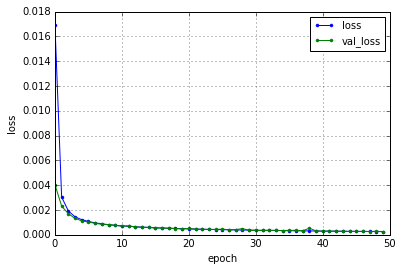

hiden node = 64
CommonName =_edim=64-Window=64-Overlap=16
Train on 15918 samples, validate on 15918 samples
Epoch 1/50
1s - loss: 0.0122 - val_loss: 0.0028
Epoch 2/50
1s - loss: 0.0020 - val_loss: 0.0016
Epoch 3/50
1s - loss: 0.0013 - val_loss: 0.0012
Epoch 4/50
1s - loss: 0.0011 - val_loss: 9.5686e-04
Epoch 5/50
1s - loss: 8.9071e-04 - val_loss: 8.2456e-04
Epoch 6/50
1s - loss: 7.6860e-04 - val_loss: 7.1344e-04
Epoch 7/50
1s - loss: 6.8157e-04 - val_loss: 6.6288e-04
Epoch 8/50
1s - loss: 6.1145e-04 - val_loss: 5.7847e-04
Epoch 9/50
1s - loss: 5.5747e-04 - val_loss: 5.3050e-04
Epoch 10/50
1s - loss: 5.1355e-04 - val_loss: 5.0162e-04
Epoch 11/50
1s - loss: 4.7658e-04 - val_loss: 4.5550e-04
Epoch 12/50
1s - loss: 4.4466e-04 - val_loss: 4.2586e-04
Epoch 13/50
1s - loss: 4.1768e-04 - val_loss: 4.1216e-04
Epoch 14/50
1s - loss: 3.9350e-04 - val_loss: 3.7727e-04
Epoch 15/50
1s - loss: 3.7160e-04 - val_loss: 3.6011e-04
Epoch 16/50
1s - loss: 3.5286e-04 - val_loss: 3.3862e-04
Epoch 17/50
1s - 

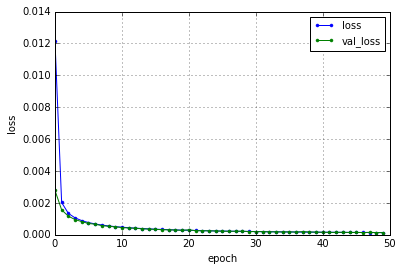

SampleNum= 128
Overlap= 32
AccZ is registed now
Build Complete
(254742,)
windowData's num =7957
SourceData's aborting data = 22
window shape is (7957, 128, 1)
hiden node = 4
CommonName =_edim=4-Window=128-Overlap=32
Train on 7957 samples, validate on 7957 samples
Epoch 1/50
0s - loss: 0.0572 - val_loss: 0.0298
Epoch 2/50
0s - loss: 0.0212 - val_loss: 0.0162
Epoch 3/50
0s - loss: 0.0139 - val_loss: 0.0122
Epoch 4/50
0s - loss: 0.0111 - val_loss: 0.0102
Epoch 5/50
0s - loss: 0.0095 - val_loss: 0.0090
Epoch 6/50
0s - loss: 0.0085 - val_loss: 0.0085
Epoch 7/50
0s - loss: 0.0077 - val_loss: 0.0073
Epoch 8/50
0s - loss: 0.0069 - val_loss: 0.0066
Epoch 9/50
0s - loss: 0.0062 - val_loss: 0.0060
Epoch 10/50
0s - loss: 0.0056 - val_loss: 0.0054
Epoch 11/50
0s - loss: 0.0051 - val_loss: 0.0049
Epoch 12/50
0s - loss: 0.0048 - val_loss: 0.0047
Epoch 13/50
0s - loss: 0.0045 - val_loss: 0.0044
Epoch 14/50
0s - loss: 0.0042 - val_loss: 0.0042
Epoch 15/50
0s - loss: 0.0041 - val_loss: 0.0041
Epoch 16/5

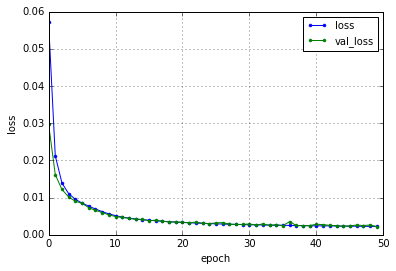

hiden node = 8
CommonName =_edim=8-Window=128-Overlap=32
Train on 7957 samples, validate on 7957 samples
Epoch 1/50
0s - loss: 0.0471 - val_loss: 0.0213
Epoch 2/50
0s - loss: 0.0155 - val_loss: 0.0119
Epoch 3/50
0s - loss: 0.0102 - val_loss: 0.0090
Epoch 4/50
0s - loss: 0.0081 - val_loss: 0.0074
Epoch 5/50
0s - loss: 0.0067 - val_loss: 0.0061
Epoch 6/50
0s - loss: 0.0056 - val_loss: 0.0055
Epoch 7/50
0s - loss: 0.0049 - val_loss: 0.0046
Epoch 8/50
0s - loss: 0.0044 - val_loss: 0.0044
Epoch 9/50
0s - loss: 0.0041 - val_loss: 0.0040
Epoch 10/50
0s - loss: 0.0038 - val_loss: 0.0039
Epoch 11/50
0s - loss: 0.0037 - val_loss: 0.0036
Epoch 12/50
0s - loss: 0.0035 - val_loss: 0.0035
Epoch 13/50
0s - loss: 0.0034 - val_loss: 0.0035
Epoch 14/50
0s - loss: 0.0033 - val_loss: 0.0032
Epoch 15/50
0s - loss: 0.0032 - val_loss: 0.0031
Epoch 16/50
0s - loss: 0.0031 - val_loss: 0.0030
Epoch 17/50
0s - loss: 0.0030 - val_loss: 0.0032
Epoch 18/50
0s - loss: 0.0029 - val_loss: 0.0029
Epoch 19/50
0s - loss:

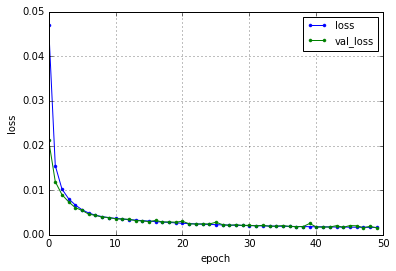

hiden node = 12
CommonName =_edim=12-Window=128-Overlap=32
Train on 7957 samples, validate on 7957 samples
Epoch 1/50
0s - loss: 0.0445 - val_loss: 0.0185
Epoch 2/50
0s - loss: 0.0130 - val_loss: 0.0100
Epoch 3/50
0s - loss: 0.0087 - val_loss: 0.0078
Epoch 4/50
0s - loss: 0.0072 - val_loss: 0.0065
Epoch 5/50
0s - loss: 0.0060 - val_loss: 0.0056
Epoch 6/50
0s - loss: 0.0050 - val_loss: 0.0046
Epoch 7/50
0s - loss: 0.0043 - val_loss: 0.0041
Epoch 8/50
0s - loss: 0.0038 - val_loss: 0.0037
Epoch 9/50
0s - loss: 0.0035 - val_loss: 0.0034
Epoch 10/50
0s - loss: 0.0033 - val_loss: 0.0032
Epoch 11/50
0s - loss: 0.0031 - val_loss: 0.0031
Epoch 12/50
0s - loss: 0.0029 - val_loss: 0.0029
Epoch 13/50
0s - loss: 0.0028 - val_loss: 0.0029
Epoch 14/50
0s - loss: 0.0027 - val_loss: 0.0027
Epoch 15/50
0s - loss: 0.0025 - val_loss: 0.0027
Epoch 16/50
0s - loss: 0.0024 - val_loss: 0.0024
Epoch 17/50
0s - loss: 0.0023 - val_loss: 0.0025
Epoch 18/50
0s - loss: 0.0023 - val_loss: 0.0024
Epoch 19/50
0s - los

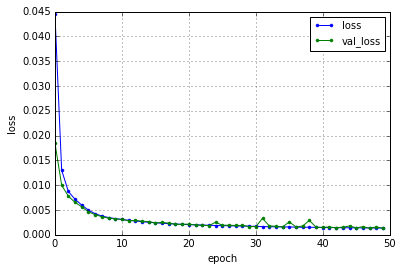

hiden node = 16
CommonName =_edim=16-Window=128-Overlap=32
Train on 7957 samples, validate on 7957 samples
Epoch 1/50
0s - loss: 0.0381 - val_loss: 0.0121
Epoch 2/50
0s - loss: 0.0095 - val_loss: 0.0079
Epoch 3/50
0s - loss: 0.0070 - val_loss: 0.0062
Epoch 4/50
0s - loss: 0.0056 - val_loss: 0.0050
Epoch 5/50
0s - loss: 0.0045 - val_loss: 0.0041
Epoch 6/50
0s - loss: 0.0039 - val_loss: 0.0040
Epoch 7/50
0s - loss: 0.0034 - val_loss: 0.0033
Epoch 8/50
0s - loss: 0.0031 - val_loss: 0.0031
Epoch 9/50
0s - loss: 0.0029 - val_loss: 0.0030
Epoch 10/50
0s - loss: 0.0028 - val_loss: 0.0029
Epoch 11/50
0s - loss: 0.0026 - val_loss: 0.0027
Epoch 12/50
0s - loss: 0.0025 - val_loss: 0.0024
Epoch 13/50
0s - loss: 0.0024 - val_loss: 0.0023
Epoch 14/50
0s - loss: 0.0023 - val_loss: 0.0023
Epoch 15/50
0s - loss: 0.0022 - val_loss: 0.0023
Epoch 16/50
0s - loss: 0.0021 - val_loss: 0.0021
Epoch 17/50
0s - loss: 0.0021 - val_loss: 0.0022
Epoch 18/50
0s - loss: 0.0020 - val_loss: 0.0021
Epoch 19/50
0s - los

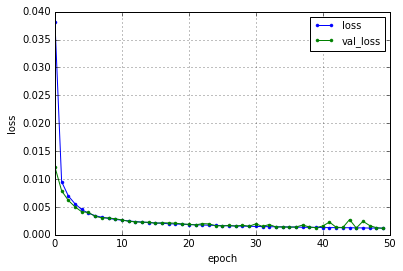

hiden node = 32
CommonName =_edim=32-Window=128-Overlap=32
Train on 7957 samples, validate on 7957 samples
Epoch 1/50
0s - loss: 0.0302 - val_loss: 0.0096
Epoch 2/50
0s - loss: 0.0077 - val_loss: 0.0063
Epoch 3/50
0s - loss: 0.0053 - val_loss: 0.0045
Epoch 4/50
0s - loss: 0.0039 - val_loss: 0.0036
Epoch 5/50
0s - loss: 0.0032 - val_loss: 0.0031
Epoch 6/50
0s - loss: 0.0028 - val_loss: 0.0029
Epoch 7/50
0s - loss: 0.0025 - val_loss: 0.0024
Epoch 8/50
0s - loss: 0.0023 - val_loss: 0.0023
Epoch 9/50
0s - loss: 0.0021 - val_loss: 0.0021
Epoch 10/50
0s - loss: 0.0020 - val_loss: 0.0020
Epoch 11/50
0s - loss: 0.0019 - val_loss: 0.0019
Epoch 12/50
0s - loss: 0.0018 - val_loss: 0.0018
Epoch 13/50
0s - loss: 0.0017 - val_loss: 0.0017
Epoch 14/50
0s - loss: 0.0017 - val_loss: 0.0017
Epoch 15/50
0s - loss: 0.0016 - val_loss: 0.0016
Epoch 16/50
0s - loss: 0.0015 - val_loss: 0.0015
Epoch 17/50
0s - loss: 0.0015 - val_loss: 0.0015
Epoch 18/50
0s - loss: 0.0014 - val_loss: 0.0014
Epoch 19/50
0s - los

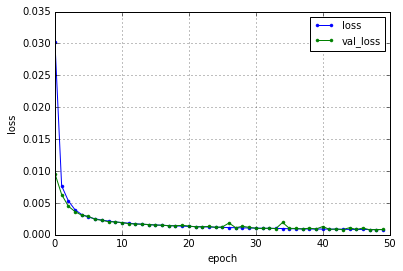

hiden node = 64
CommonName =_edim=64-Window=128-Overlap=32
Train on 7957 samples, validate on 7957 samples
Epoch 1/50
0s - loss: 0.0213 - val_loss: 0.0065
Epoch 2/50
0s - loss: 0.0049 - val_loss: 0.0038
Epoch 3/50
0s - loss: 0.0032 - val_loss: 0.0029
Epoch 4/50
0s - loss: 0.0026 - val_loss: 0.0024
Epoch 5/50
0s - loss: 0.0023 - val_loss: 0.0021
Epoch 6/50
0s - loss: 0.0020 - val_loss: 0.0019
Epoch 7/50
0s - loss: 0.0018 - val_loss: 0.0018
Epoch 8/50
0s - loss: 0.0017 - val_loss: 0.0016
Epoch 9/50
0s - loss: 0.0016 - val_loss: 0.0016
Epoch 10/50
0s - loss: 0.0015 - val_loss: 0.0015
Epoch 11/50
0s - loss: 0.0014 - val_loss: 0.0015
Epoch 12/50
0s - loss: 0.0014 - val_loss: 0.0014
Epoch 13/50
0s - loss: 0.0013 - val_loss: 0.0013
Epoch 14/50
0s - loss: 0.0012 - val_loss: 0.0012
Epoch 15/50
0s - loss: 0.0012 - val_loss: 0.0012
Epoch 16/50
0s - loss: 0.0011 - val_loss: 0.0011
Epoch 17/50
0s - loss: 0.0011 - val_loss: 0.0011
Epoch 18/50
0s - loss: 0.0011 - val_loss: 0.0011
Epoch 19/50
0s - los

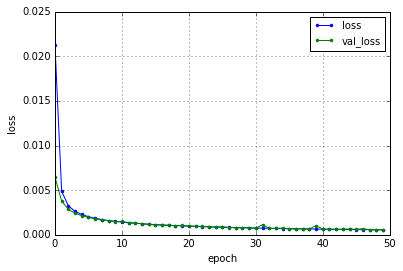

SampleNum= 256
Overlap= 64
AccZ is registed now
Build Complete
(254742,)
windowData's num =3977
SourceData's aborting data = 22
window shape is (3977, 256, 1)
hiden node = 4
CommonName =_edim=4-Window=256-Overlap=64
Train on 3977 samples, validate on 3977 samples
Epoch 1/50
0s - loss: 0.0710 - val_loss: 0.0553
Epoch 2/50
0s - loss: 0.0435 - val_loss: 0.0348
Epoch 3/50
0s - loss: 0.0305 - val_loss: 0.0270
Epoch 4/50
0s - loss: 0.0247 - val_loss: 0.0227
Epoch 5/50
0s - loss: 0.0213 - val_loss: 0.0199
Epoch 6/50
0s - loss: 0.0189 - val_loss: 0.0179
Epoch 7/50
0s - loss: 0.0172 - val_loss: 0.0165
Epoch 8/50
0s - loss: 0.0158 - val_loss: 0.0152
Epoch 9/50
0s - loss: 0.0147 - val_loss: 0.0141
Epoch 10/50
0s - loss: 0.0137 - val_loss: 0.0134
Epoch 11/50
0s - loss: 0.0128 - val_loss: 0.0124
Epoch 12/50
0s - loss: 0.0121 - val_loss: 0.0117
Epoch 13/50
0s - loss: 0.0115 - val_loss: 0.0112
Epoch 14/50
0s - loss: 0.0109 - val_loss: 0.0106
Epoch 15/50
0s - loss: 0.0105 - val_loss: 0.0103
Epoch 16/5

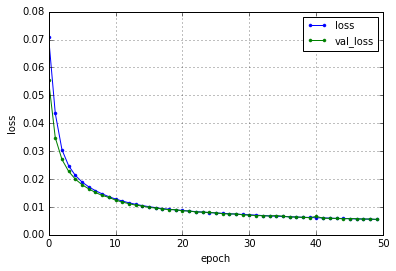

hiden node = 8
CommonName =_edim=8-Window=256-Overlap=64
Train on 3977 samples, validate on 3977 samples
Epoch 1/50
0s - loss: 0.0652 - val_loss: 0.0422
Epoch 2/50
0s - loss: 0.0305 - val_loss: 0.0236
Epoch 3/50
0s - loss: 0.0209 - val_loss: 0.0188
Epoch 4/50
0s - loss: 0.0174 - val_loss: 0.0162
Epoch 5/50
0s - loss: 0.0154 - val_loss: 0.0146
Epoch 6/50
0s - loss: 0.0139 - val_loss: 0.0133
Epoch 7/50
0s - loss: 0.0127 - val_loss: 0.0122
Epoch 8/50
0s - loss: 0.0116 - val_loss: 0.0111
Epoch 9/50
0s - loss: 0.0107 - val_loss: 0.0102
Epoch 10/50
0s - loss: 0.0099 - val_loss: 0.0095
Epoch 11/50
0s - loss: 0.0092 - val_loss: 0.0090
Epoch 12/50
0s - loss: 0.0087 - val_loss: 0.0084
Epoch 13/50
0s - loss: 0.0082 - val_loss: 0.0079
Epoch 14/50
0s - loss: 0.0078 - val_loss: 0.0076
Epoch 15/50
0s - loss: 0.0075 - val_loss: 0.0075
Epoch 16/50
0s - loss: 0.0072 - val_loss: 0.0070
Epoch 17/50
0s - loss: 0.0070 - val_loss: 0.0068
Epoch 18/50
0s - loss: 0.0067 - val_loss: 0.0067
Epoch 19/50
0s - loss:

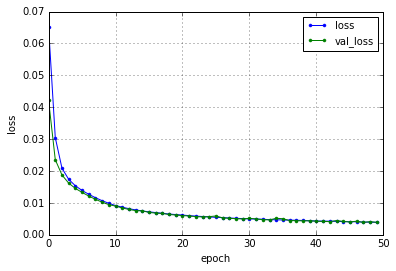

hiden node = 12
CommonName =_edim=12-Window=256-Overlap=64
Train on 3977 samples, validate on 3977 samples
Epoch 1/50
0s - loss: 0.0662 - val_loss: 0.0416
Epoch 2/50
0s - loss: 0.0291 - val_loss: 0.0215
Epoch 3/50
0s - loss: 0.0187 - val_loss: 0.0166
Epoch 4/50
0s - loss: 0.0153 - val_loss: 0.0142
Epoch 5/50
0s - loss: 0.0134 - val_loss: 0.0126
Epoch 6/50
0s - loss: 0.0119 - val_loss: 0.0113
Epoch 7/50
0s - loss: 0.0107 - val_loss: 0.0102
Epoch 8/50
0s - loss: 0.0097 - val_loss: 0.0092
Epoch 9/50
0s - loss: 0.0089 - val_loss: 0.0085
Epoch 10/50
0s - loss: 0.0082 - val_loss: 0.0079
Epoch 11/50
0s - loss: 0.0077 - val_loss: 0.0075
Epoch 12/50
0s - loss: 0.0072 - val_loss: 0.0070
Epoch 13/50
0s - loss: 0.0068 - val_loss: 0.0066
Epoch 14/50
0s - loss: 0.0065 - val_loss: 0.0064
Epoch 15/50
0s - loss: 0.0063 - val_loss: 0.0064
Epoch 16/50
0s - loss: 0.0060 - val_loss: 0.0059
Epoch 17/50
0s - loss: 0.0058 - val_loss: 0.0057
Epoch 18/50
0s - loss: 0.0056 - val_loss: 0.0054
Epoch 19/50
0s - los

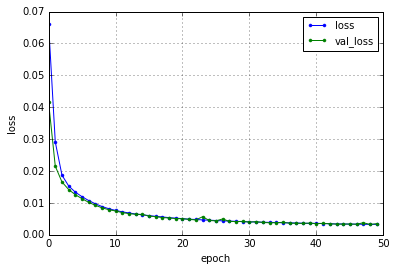

hiden node = 16
CommonName =_edim=16-Window=256-Overlap=64
Train on 3977 samples, validate on 3977 samples
Epoch 1/50
0s - loss: 0.0569 - val_loss: 0.0298
Epoch 2/50
0s - loss: 0.0217 - val_loss: 0.0172
Epoch 3/50
0s - loss: 0.0155 - val_loss: 0.0142
Epoch 4/50
0s - loss: 0.0133 - val_loss: 0.0124
Epoch 5/50
0s - loss: 0.0118 - val_loss: 0.0111
Epoch 6/50
0s - loss: 0.0105 - val_loss: 0.0099
Epoch 7/50
0s - loss: 0.0094 - val_loss: 0.0089
Epoch 8/50
0s - loss: 0.0085 - val_loss: 0.0080
Epoch 9/50
0s - loss: 0.0078 - val_loss: 0.0074
Epoch 10/50
0s - loss: 0.0072 - val_loss: 0.0072
Epoch 11/50
0s - loss: 0.0067 - val_loss: 0.0068
Epoch 12/50
0s - loss: 0.0064 - val_loss: 0.0062
Epoch 13/50
0s - loss: 0.0061 - val_loss: 0.0059
Epoch 14/50
0s - loss: 0.0058 - val_loss: 0.0057
Epoch 15/50
0s - loss: 0.0056 - val_loss: 0.0055
Epoch 16/50
0s - loss: 0.0054 - val_loss: 0.0053
Epoch 17/50
0s - loss: 0.0052 - val_loss: 0.0051
Epoch 18/50
0s - loss: 0.0050 - val_loss: 0.0050
Epoch 19/50
0s - los

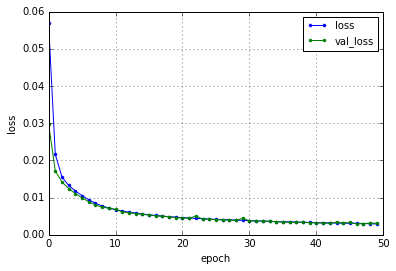

hiden node = 32
CommonName =_edim=32-Window=256-Overlap=64
Train on 3977 samples, validate on 3977 samples
Epoch 1/50
0s - loss: 0.0488 - val_loss: 0.0209
Epoch 2/50
0s - loss: 0.0162 - val_loss: 0.0135
Epoch 3/50
0s - loss: 0.0123 - val_loss: 0.0112
Epoch 4/50
0s - loss: 0.0103 - val_loss: 0.0094
Epoch 5/50
0s - loss: 0.0087 - val_loss: 0.0080
Epoch 6/50
0s - loss: 0.0075 - val_loss: 0.0070
Epoch 7/50
0s - loss: 0.0067 - val_loss: 0.0064
Epoch 8/50
0s - loss: 0.0061 - val_loss: 0.0060
Epoch 9/50
0s - loss: 0.0057 - val_loss: 0.0055
Epoch 10/50
0s - loss: 0.0053 - val_loss: 0.0053
Epoch 11/50
0s - loss: 0.0051 - val_loss: 0.0050
Epoch 12/50
0s - loss: 0.0048 - val_loss: 0.0047
Epoch 13/50
0s - loss: 0.0046 - val_loss: 0.0045
Epoch 14/50
0s - loss: 0.0044 - val_loss: 0.0043
Epoch 15/50
0s - loss: 0.0042 - val_loss: 0.0041
Epoch 16/50
0s - loss: 0.0041 - val_loss: 0.0041
Epoch 17/50
0s - loss: 0.0039 - val_loss: 0.0039
Epoch 18/50
0s - loss: 0.0038 - val_loss: 0.0037
Epoch 19/50
0s - los

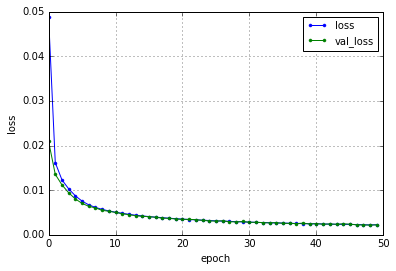

hiden node = 64
CommonName =_edim=64-Window=256-Overlap=64
Train on 3977 samples, validate on 3977 samples
Epoch 1/50
0s - loss: 0.0371 - val_loss: 0.0147
Epoch 2/50
0s - loss: 0.0123 - val_loss: 0.0105
Epoch 3/50
0s - loss: 0.0093 - val_loss: 0.0082
Epoch 4/50
0s - loss: 0.0074 - val_loss: 0.0068
Epoch 5/50
0s - loss: 0.0062 - val_loss: 0.0057
Epoch 6/50
0s - loss: 0.0054 - val_loss: 0.0051
Epoch 7/50
0s - loss: 0.0049 - val_loss: 0.0047
Epoch 8/50
0s - loss: 0.0045 - val_loss: 0.0043
Epoch 9/50
0s - loss: 0.0041 - val_loss: 0.0040
Epoch 10/50
0s - loss: 0.0039 - val_loss: 0.0037
Epoch 11/50
0s - loss: 0.0037 - val_loss: 0.0035
Epoch 12/50
0s - loss: 0.0035 - val_loss: 0.0034
Epoch 13/50
0s - loss: 0.0033 - val_loss: 0.0033
Epoch 14/50
0s - loss: 0.0032 - val_loss: 0.0032
Epoch 15/50
0s - loss: 0.0031 - val_loss: 0.0030
Epoch 16/50
0s - loss: 0.0029 - val_loss: 0.0031
Epoch 17/50
0s - loss: 0.0028 - val_loss: 0.0028
Epoch 18/50
0s - loss: 0.0028 - val_loss: 0.0027
Epoch 19/50
0s - los

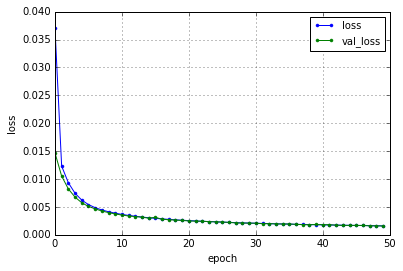

SampleNum= 512
Overlap= 128
AccZ is registed now
Build Complete
(254742,)
windowData's num =1987
SourceData's aborting data = 22
window shape is (1987, 512, 1)
hiden node = 4
CommonName =_edim=4-Window=512-Overlap=128
Train on 1987 samples, validate on 1987 samples
Epoch 1/50
0s - loss: 0.0804 - val_loss: 0.0771
Epoch 2/50
0s - loss: 0.0715 - val_loss: 0.0650
Epoch 3/50
0s - loss: 0.0591 - val_loss: 0.0536
Epoch 4/50
0s - loss: 0.0496 - val_loss: 0.0460
Epoch 5/50
0s - loss: 0.0435 - val_loss: 0.0411
Epoch 6/50
0s - loss: 0.0394 - val_loss: 0.0377
Epoch 7/50
0s - loss: 0.0364 - val_loss: 0.0352
Epoch 8/50
0s - loss: 0.0341 - val_loss: 0.0331
Epoch 9/50
0s - loss: 0.0323 - val_loss: 0.0315
Epoch 10/50
0s - loss: 0.0308 - val_loss: 0.0301
Epoch 11/50
0s - loss: 0.0295 - val_loss: 0.0289
Epoch 12/50
0s - loss: 0.0284 - val_loss: 0.0279
Epoch 13/50
0s - loss: 0.0274 - val_loss: 0.0270
Epoch 14/50
0s - loss: 0.0266 - val_loss: 0.0262
Epoch 15/50
0s - loss: 0.0258 - val_loss: 0.0254
Epoch 16

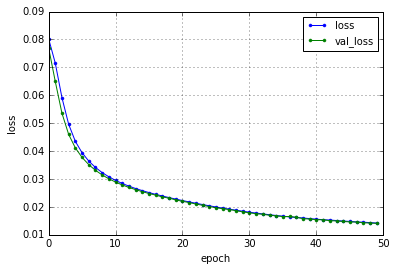

hiden node = 8
CommonName =_edim=8-Window=512-Overlap=128
Train on 1987 samples, validate on 1987 samples
Epoch 1/50
0s - loss: 0.0776 - val_loss: 0.0705
Epoch 2/50
0s - loss: 0.0625 - val_loss: 0.0541
Epoch 3/50
0s - loss: 0.0479 - val_loss: 0.0424
Epoch 4/50
0s - loss: 0.0389 - val_loss: 0.0357
Epoch 5/50
0s - loss: 0.0336 - val_loss: 0.0316
Epoch 6/50
0s - loss: 0.0302 - val_loss: 0.0288
Epoch 7/50
0s - loss: 0.0277 - val_loss: 0.0267
Epoch 8/50
0s - loss: 0.0259 - val_loss: 0.0250
Epoch 9/50
0s - loss: 0.0244 - val_loss: 0.0237
Epoch 10/50
0s - loss: 0.0231 - val_loss: 0.0225
Epoch 11/50
0s - loss: 0.0220 - val_loss: 0.0215
Epoch 12/50
0s - loss: 0.0210 - val_loss: 0.0205
Epoch 13/50
0s - loss: 0.0201 - val_loss: 0.0197
Epoch 14/50
0s - loss: 0.0193 - val_loss: 0.0190
Epoch 15/50
0s - loss: 0.0186 - val_loss: 0.0182
Epoch 16/50
0s - loss: 0.0179 - val_loss: 0.0175
Epoch 17/50
0s - loss: 0.0173 - val_loss: 0.0170
Epoch 18/50
0s - loss: 0.0167 - val_loss: 0.0164
Epoch 19/50
0s - loss

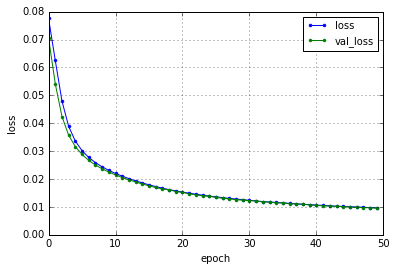

hiden node = 12
CommonName =_edim=12-Window=512-Overlap=128
Train on 1987 samples, validate on 1987 samples
Epoch 1/50
0s - loss: 0.0772 - val_loss: 0.0692
Epoch 2/50
0s - loss: 0.0594 - val_loss: 0.0495
Epoch 3/50
0s - loss: 0.0430 - val_loss: 0.0375
Epoch 4/50
0s - loss: 0.0342 - val_loss: 0.0314
Epoch 5/50
0s - loss: 0.0295 - val_loss: 0.0277
Epoch 6/50
0s - loss: 0.0264 - val_loss: 0.0252
Epoch 7/50
0s - loss: 0.0243 - val_loss: 0.0234
Epoch 8/50
0s - loss: 0.0226 - val_loss: 0.0219
Epoch 9/50
0s - loss: 0.0213 - val_loss: 0.0207
Epoch 10/50
0s - loss: 0.0201 - val_loss: 0.0196
Epoch 11/50
0s - loss: 0.0191 - val_loss: 0.0186
Epoch 12/50
0s - loss: 0.0182 - val_loss: 0.0177
Epoch 13/50
0s - loss: 0.0174 - val_loss: 0.0169
Epoch 14/50
0s - loss: 0.0166 - val_loss: 0.0163
Epoch 15/50
0s - loss: 0.0159 - val_loss: 0.0156
Epoch 16/50
0s - loss: 0.0153 - val_loss: 0.0150
Epoch 17/50
0s - loss: 0.0149 - val_loss: 0.0146
Epoch 18/50
0s - loss: 0.0144 - val_loss: 0.0141
Epoch 19/50
0s - lo

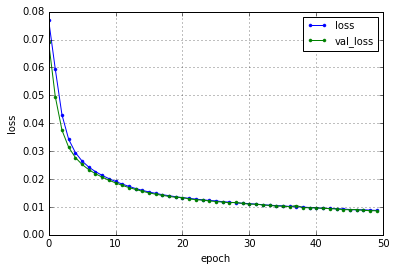

hiden node = 16
CommonName =_edim=16-Window=512-Overlap=128
Train on 1987 samples, validate on 1987 samples
Epoch 1/50
0s - loss: 0.0750 - val_loss: 0.0637
Epoch 2/50
0s - loss: 0.0526 - val_loss: 0.0425
Epoch 3/50
0s - loss: 0.0366 - val_loss: 0.0318
Epoch 4/50
0s - loss: 0.0293 - val_loss: 0.0270
Epoch 5/50
0s - loss: 0.0256 - val_loss: 0.0243
Epoch 6/50
0s - loss: 0.0234 - val_loss: 0.0225
Epoch 7/50
0s - loss: 0.0219 - val_loss: 0.0212
Epoch 8/50
0s - loss: 0.0207 - val_loss: 0.0202
Epoch 9/50
0s - loss: 0.0197 - val_loss: 0.0192
Epoch 10/50
0s - loss: 0.0188 - val_loss: 0.0184
Epoch 11/50
0s - loss: 0.0180 - val_loss: 0.0176
Epoch 12/50
0s - loss: 0.0172 - val_loss: 0.0168
Epoch 13/50
0s - loss: 0.0164 - val_loss: 0.0160
Epoch 14/50
0s - loss: 0.0157 - val_loss: 0.0153
Epoch 15/50
0s - loss: 0.0150 - val_loss: 0.0146
Epoch 16/50
0s - loss: 0.0143 - val_loss: 0.0140
Epoch 17/50
0s - loss: 0.0138 - val_loss: 0.0135
Epoch 18/50
0s - loss: 0.0133 - val_loss: 0.0130
Epoch 19/50
0s - lo

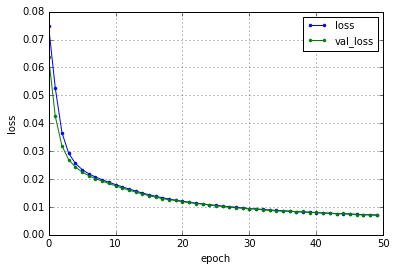

hiden node = 32
CommonName =_edim=32-Window=512-Overlap=128
Train on 1987 samples, validate on 1987 samples
Epoch 1/50
0s - loss: 0.0752 - val_loss: 0.0567
Epoch 2/50
0s - loss: 0.0419 - val_loss: 0.0307
Epoch 3/50
0s - loss: 0.0265 - val_loss: 0.0234
Epoch 4/50
0s - loss: 0.0220 - val_loss: 0.0207
Epoch 5/50
0s - loss: 0.0199 - val_loss: 0.0191
Epoch 6/50
0s - loss: 0.0184 - val_loss: 0.0177
Epoch 7/50
0s - loss: 0.0172 - val_loss: 0.0166
Epoch 8/50
0s - loss: 0.0161 - val_loss: 0.0155
Epoch 9/50
0s - loss: 0.0151 - val_loss: 0.0146
Epoch 10/50
0s - loss: 0.0141 - val_loss: 0.0136
Epoch 11/50
0s - loss: 0.0132 - val_loss: 0.0128
Epoch 12/50
0s - loss: 0.0125 - val_loss: 0.0121
Epoch 13/50
0s - loss: 0.0118 - val_loss: 0.0115
Epoch 14/50
0s - loss: 0.0112 - val_loss: 0.0110
Epoch 15/50
0s - loss: 0.0108 - val_loss: 0.0105
Epoch 16/50
0s - loss: 0.0103 - val_loss: 0.0101
Epoch 17/50
0s - loss: 0.0100 - val_loss: 0.0097
Epoch 18/50
0s - loss: 0.0096 - val_loss: 0.0095
Epoch 19/50
0s - lo

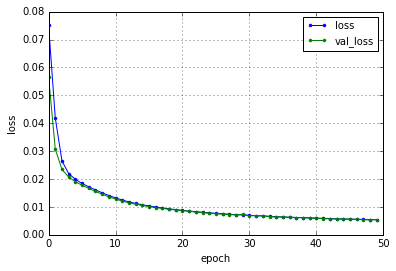

hiden node = 64
CommonName =_edim=64-Window=512-Overlap=128
Train on 1987 samples, validate on 1987 samples
Epoch 1/50
0s - loss: 0.0645 - val_loss: 0.0410
Epoch 2/50
0s - loss: 0.0302 - val_loss: 0.0234
Epoch 3/50
0s - loss: 0.0211 - val_loss: 0.0192
Epoch 4/50
0s - loss: 0.0181 - val_loss: 0.0171
Epoch 5/50
0s - loss: 0.0162 - val_loss: 0.0154
Epoch 6/50
0s - loss: 0.0147 - val_loss: 0.0139
Epoch 7/50
0s - loss: 0.0134 - val_loss: 0.0127
Epoch 8/50
0s - loss: 0.0123 - val_loss: 0.0117
Epoch 9/50
0s - loss: 0.0113 - val_loss: 0.0109
Epoch 10/50
0s - loss: 0.0106 - val_loss: 0.0103
Epoch 11/50
0s - loss: 0.0100 - val_loss: 0.0097
Epoch 12/50
0s - loss: 0.0095 - val_loss: 0.0092
Epoch 13/50
0s - loss: 0.0090 - val_loss: 0.0088
Epoch 14/50
0s - loss: 0.0086 - val_loss: 0.0084
Epoch 15/50
0s - loss: 0.0083 - val_loss: 0.0081
Epoch 16/50
0s - loss: 0.0080 - val_loss: 0.0078
Epoch 17/50
0s - loss: 0.0077 - val_loss: 0.0075
Epoch 18/50
0s - loss: 0.0074 - val_loss: 0.0073
Epoch 19/50
0s - lo

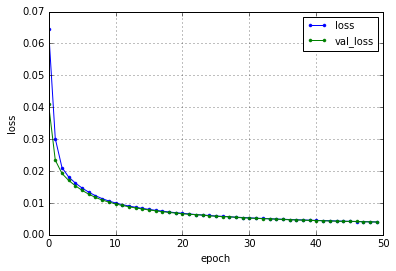

SampleNum= 1024
Overlap= 256
AccZ is registed now
Build Complete
(254742,)
windowData's num =992
SourceData's aborting data = 22
window shape is (992, 1024, 1)
hiden node = 4
CommonName =_edim=4-Window=1024-Overlap=256
Train on 992 samples, validate on 992 samples
Epoch 1/50
0s - loss: 0.0814 - val_loss: 0.0808
Epoch 2/50
0s - loss: 0.0800 - val_loss: 0.0788
Epoch 3/50
0s - loss: 0.0775 - val_loss: 0.0759
Epoch 4/50
0s - loss: 0.0742 - val_loss: 0.0723
Epoch 5/50
0s - loss: 0.0706 - val_loss: 0.0687
Epoch 6/50
0s - loss: 0.0670 - val_loss: 0.0653
Epoch 7/50
0s - loss: 0.0638 - val_loss: 0.0622
Epoch 8/50
0s - loss: 0.0609 - val_loss: 0.0595
Epoch 9/50
0s - loss: 0.0583 - val_loss: 0.0571
Epoch 10/50
0s - loss: 0.0561 - val_loss: 0.0551
Epoch 11/50
0s - loss: 0.0542 - val_loss: 0.0533
Epoch 12/50
0s - loss: 0.0526 - val_loss: 0.0518
Epoch 13/50
0s - loss: 0.0511 - val_loss: 0.0504
Epoch 14/50
0s - loss: 0.0498 - val_loss: 0.0492
Epoch 15/50
0s - loss: 0.0486 - val_loss: 0.0480
Epoch 16/

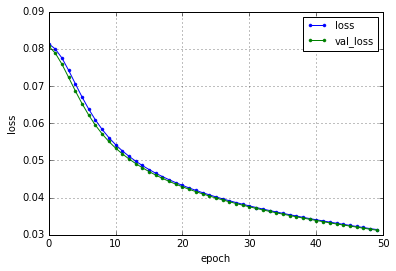

hiden node = 8
CommonName =_edim=8-Window=1024-Overlap=256
Train on 992 samples, validate on 992 samples
Epoch 1/50
0s - loss: 0.0816 - val_loss: 0.0804
Epoch 2/50
0s - loss: 0.0791 - val_loss: 0.0772
Epoch 3/50
0s - loss: 0.0750 - val_loss: 0.0723
Epoch 4/50
0s - loss: 0.0696 - val_loss: 0.0665
Epoch 5/50
0s - loss: 0.0639 - val_loss: 0.0611
Epoch 6/50
0s - loss: 0.0588 - val_loss: 0.0564
Epoch 7/50
0s - loss: 0.0546 - val_loss: 0.0527
Epoch 8/50
0s - loss: 0.0513 - val_loss: 0.0497
Epoch 9/50
0s - loss: 0.0486 - val_loss: 0.0474
Epoch 10/50
0s - loss: 0.0464 - val_loss: 0.0454
Epoch 11/50
0s - loss: 0.0446 - val_loss: 0.0438
Epoch 12/50
0s - loss: 0.0431 - val_loss: 0.0424
Epoch 13/50
0s - loss: 0.0418 - val_loss: 0.0411
Epoch 14/50
0s - loss: 0.0406 - val_loss: 0.0400
Epoch 15/50
0s - loss: 0.0396 - val_loss: 0.0391
Epoch 16/50
0s - loss: 0.0387 - val_loss: 0.0382
Epoch 17/50
0s - loss: 0.0378 - val_loss: 0.0374
Epoch 18/50
0s - loss: 0.0370 - val_loss: 0.0366
Epoch 19/50
0s - loss:

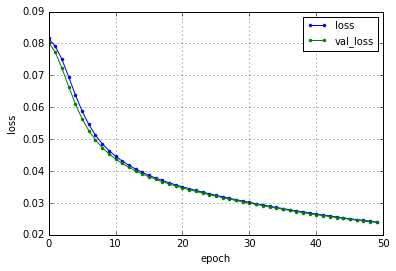

hiden node = 12
CommonName =_edim=12-Window=1024-Overlap=256
Train on 992 samples, validate on 992 samples
Epoch 1/50
0s - loss: 0.0815 - val_loss: 0.0798
Epoch 2/50
0s - loss: 0.0779 - val_loss: 0.0754
Epoch 3/50
0s - loss: 0.0726 - val_loss: 0.0692
Epoch 4/50
0s - loss: 0.0660 - val_loss: 0.0625
Epoch 5/50
0s - loss: 0.0595 - val_loss: 0.0564
Epoch 6/50
0s - loss: 0.0540 - val_loss: 0.0514
Epoch 7/50
0s - loss: 0.0496 - val_loss: 0.0476
Epoch 8/50
0s - loss: 0.0462 - val_loss: 0.0447
Epoch 9/50
0s - loss: 0.0436 - val_loss: 0.0424
Epoch 10/50
0s - loss: 0.0415 - val_loss: 0.0405
Epoch 11/50
0s - loss: 0.0398 - val_loss: 0.0390
Epoch 12/50
0s - loss: 0.0384 - val_loss: 0.0377
Epoch 13/50
0s - loss: 0.0372 - val_loss: 0.0366
Epoch 14/50
0s - loss: 0.0362 - val_loss: 0.0357
Epoch 15/50
0s - loss: 0.0353 - val_loss: 0.0348
Epoch 16/50
0s - loss: 0.0345 - val_loss: 0.0341
Epoch 17/50
0s - loss: 0.0338 - val_loss: 0.0334
Epoch 18/50
0s - loss: 0.0331 - val_loss: 0.0327
Epoch 19/50
0s - los

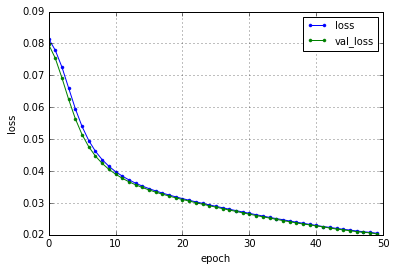

hiden node = 16
CommonName =_edim=16-Window=1024-Overlap=256
Train on 992 samples, validate on 992 samples
Epoch 1/50
0s - loss: 0.0815 - val_loss: 0.0794
Epoch 2/50
0s - loss: 0.0769 - val_loss: 0.0735
Epoch 3/50
0s - loss: 0.0697 - val_loss: 0.0653
Epoch 4/50
0s - loss: 0.0614 - val_loss: 0.0572
Epoch 5/50
0s - loss: 0.0539 - val_loss: 0.0506
Epoch 6/50
0s - loss: 0.0482 - val_loss: 0.0458
Epoch 7/50
0s - loss: 0.0441 - val_loss: 0.0424
Epoch 8/50
0s - loss: 0.0412 - val_loss: 0.0399
Epoch 9/50
0s - loss: 0.0390 - val_loss: 0.0380
Epoch 10/50
0s - loss: 0.0373 - val_loss: 0.0365
Epoch 11/50
0s - loss: 0.0359 - val_loss: 0.0352
Epoch 12/50
0s - loss: 0.0347 - val_loss: 0.0342
Epoch 13/50
0s - loss: 0.0337 - val_loss: 0.0332
Epoch 14/50
0s - loss: 0.0329 - val_loss: 0.0324
Epoch 15/50
0s - loss: 0.0321 - val_loss: 0.0317
Epoch 16/50
0s - loss: 0.0313 - val_loss: 0.0310
Epoch 17/50
0s - loss: 0.0307 - val_loss: 0.0303
Epoch 18/50
0s - loss: 0.0300 - val_loss: 0.0297
Epoch 19/50
0s - los

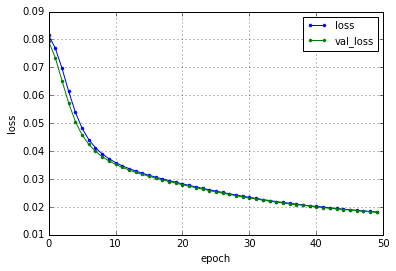

hiden node = 32
CommonName =_edim=32-Window=1024-Overlap=256
Train on 992 samples, validate on 992 samples
Epoch 1/50
0s - loss: 0.0820 - val_loss: 0.0776
Epoch 2/50
0s - loss: 0.0736 - val_loss: 0.0684
Epoch 3/50
0s - loss: 0.0633 - val_loss: 0.0576
Epoch 4/50
0s - loss: 0.0531 - val_loss: 0.0485
Epoch 5/50
0s - loss: 0.0452 - val_loss: 0.0421
Epoch 6/50
0s - loss: 0.0400 - val_loss: 0.0379
Epoch 7/50
0s - loss: 0.0365 - val_loss: 0.0351
Epoch 8/50
0s - loss: 0.0341 - val_loss: 0.0330
Epoch 9/50
0s - loss: 0.0323 - val_loss: 0.0314
Epoch 10/50
0s - loss: 0.0308 - val_loss: 0.0301
Epoch 11/50
0s - loss: 0.0296 - val_loss: 0.0290
Epoch 12/50
0s - loss: 0.0285 - val_loss: 0.0280
Epoch 13/50
0s - loss: 0.0276 - val_loss: 0.0271
Epoch 14/50
0s - loss: 0.0267 - val_loss: 0.0263
Epoch 15/50
0s - loss: 0.0259 - val_loss: 0.0255
Epoch 16/50
0s - loss: 0.0252 - val_loss: 0.0247
Epoch 17/50
0s - loss: 0.0244 - val_loss: 0.0241
Epoch 18/50
0s - loss: 0.0238 - val_loss: 0.0234
Epoch 19/50
0s - los

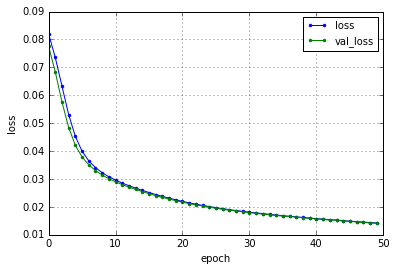

hiden node = 64
CommonName =_edim=64-Window=1024-Overlap=256
Train on 992 samples, validate on 992 samples
Epoch 1/50
0s - loss: 0.0802 - val_loss: 0.0711
Epoch 2/50
0s - loss: 0.0634 - val_loss: 0.0545
Epoch 3/50
0s - loss: 0.0480 - val_loss: 0.0417
Epoch 4/50
0s - loss: 0.0380 - val_loss: 0.0348
Epoch 5/50
0s - loss: 0.0329 - val_loss: 0.0312
Epoch 6/50
0s - loss: 0.0301 - val_loss: 0.0289
Epoch 7/50
0s - loss: 0.0282 - val_loss: 0.0273
Epoch 8/50
0s - loss: 0.0267 - val_loss: 0.0260
Epoch 9/50
0s - loss: 0.0255 - val_loss: 0.0248
Epoch 10/50
0s - loss: 0.0244 - val_loss: 0.0238
Epoch 11/50
0s - loss: 0.0234 - val_loss: 0.0228
Epoch 12/50
0s - loss: 0.0224 - val_loss: 0.0219
Epoch 13/50
0s - loss: 0.0215 - val_loss: 0.0211
Epoch 14/50
0s - loss: 0.0207 - val_loss: 0.0203
Epoch 15/50
0s - loss: 0.0200 - val_loss: 0.0196
Epoch 16/50
0s - loss: 0.0193 - val_loss: 0.0190
Epoch 17/50
0s - loss: 0.0187 - val_loss: 0.0184
Epoch 18/50
0s - loss: 0.0182 - val_loss: 0.0179
Epoch 19/50
0s - los

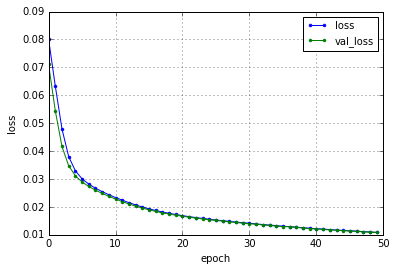

In [8]:
# loop windowWidth
for SampleNum,Overlap in zip(WindowWidth,OverlapArray):
    print "SampleNum= "+str(SampleNum)
    print "Overlap= "+str(Overlap)
    w=window.Window()
    w.SetData(Axis,dic[Axis])
    wind=w.Compile(windowWidth=SampleNum,overlapNum=Overlap)
    windoW=wind.reshape((len(wind),np.prod(wind.shape[1:])))
    
    # define SaveFileName
    for encoding_dim in EncodingDim:
        print "hiden node = "+str(encoding_dim)
        CommonName = '_edim='+str(encoding_dim)+'-Window='+str(SampleNum)+'-Overlap='+str(Overlap)
        print "CommonName ="+CommonName
        SaveFileNameEncord=DataName+'_encoded'+CommonName
        SaveFileNameDecord=DataName+'_decoded'+CommonName
        SaveFileNameNet=DataName+'_net'+CommonName
        SaveFileNameTrain=DataName+'_train'+CommonName
        SaveFileNameTest=DataName+'_test'+CommonName
        SaveFileNameGlaph=GlaphDataPath+DataName+CommonName+'_loss_val_loss.png'

        window_test=windoW
        window_train=windoW
        processing.SaveDicDataFromFileNPZ(WindowDataPath,SaveFileNameTrain,window_test)
        processing.SaveDicDataFromFileNPZ(WindowDataPath,SaveFileNameTest,window_test)
        shapeNum=windoW.shape[1]

        # this is our input placeholder
        input_img = Input(shape=(shapeNum,))
        # "encoded" is the encoded representation of the input
        encoded = Dense(encoding_dim, activation='tanh')(input_img)
        # "decoded" is the lossy reconstruction of the input
        decoded = Dense(shapeNum, activation='linear')(encoded)

        # this model maps an input to its reconstruction
        autoencoder = Model(input=input_img, output=decoded)

        # this model maps an input to its encoded representation
        encoder = Model(input=input_img, output=encoded)

        # create a placeholder for an encoded (32-dimensional) input
        encoded_input = Input(shape=(encoding_dim,))
        # retrieve the last layer of the autoencoder model
        decoder_layer = autoencoder.layers[-1]
        # create the decoder model
        decoder = Model(input=encoded_input, output=decoder_layer(encoded_input))

        autoencoder.compile(optimizer='adadelta', loss='mse')
        plot(autoencoder,  to_file=StudyDataModelPicPath+SaveFileNameNet+'.png')

        early_stopping = EarlyStopping(monitor='val_loss', patience=5)
        hist = autoencoder.fit(window_train, window_train,
                        nb_epoch=50,
                        verbose=2,
                        batch_size=BATCH_SIZE,
                        shuffle=True,
                        validation_data=(window_test, window_test),
                        callbacks=[early_stopping])

        encoded_imgs = encoder.predict(window_test)
        decoded_imgs = decoder.predict(encoded_imgs)

        processing.SaveDicDataFromFileNPZ(StudyDataPath,SaveFileNameEncord,encoded_imgs)
        processing.SaveDicDataFromFileNPZ(StudyDataPath,SaveFileNameDecord,decoded_imgs)

        # save model and wights
        json_string = encoder.to_json()
        open(StudyDataPath+SaveFileNameEncord+'.json', 'w').write(json_string)
        encoder.save_weights(StudyDataPath+SaveFileNameEncord+'_weights.h5',overwrite=True)

        json_string = decoder.to_json()
        open(StudyDataPath+SaveFileNameDecord+'.json', 'w').write(json_string)
        decoder.save_weights(StudyDataPath+SaveFileNameDecord+'_weights.h5',overwrite=True)

        json_string = autoencoder.to_json()
        open(StudyDataPath+SaveFileNameNet+'.json', 'w').write(json_string)
        autoencoder.save_weights(StudyDataPath+SaveFileNameNet+'_weights.h5',overwrite=True)

        # plot loss
        loss = hist.history['loss']
        val_loss = hist.history['val_loss']

        nb_epoch = len(loss)
        plt.plot(range(nb_epoch), loss, marker='.', label='loss')
        plt.plot(range(nb_epoch), val_loss, marker='.', label='val_loss')
        plt.legend(loc='best', fontsize=10)
        plt.grid()
        plt.xlabel('epoch')
        plt.ylabel('loss')
        plt.savefig(SaveFileNameGlaph)
        plt.show()